In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [37]:

iris_data = pd.read_csv('Iris.csv')
iris_data.head()
   

   

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

iris_data['Species'] = le.fit_transform(iris_data['Species'])
iris_data['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

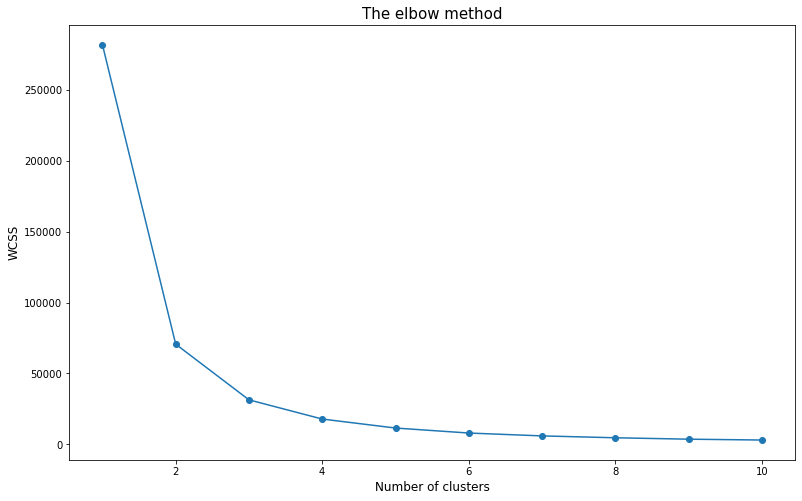

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

x = iris_data.iloc[:, [0, 1, 2, 3, 4]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(13,8))
plt.plot(range(1, 11), wcss,marker='o')
plt.title('The elbow method',size=15)
plt.xlabel('Number of clusters',size=12)
plt.ylabel('WCSS',size=12) #within cluster sum of squares
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = kmeans.fit_predict(x)

In [45]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
kmeans.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552,   2.026],
       [ 25.5  ,   5.006,   3.418,   1.464,   0.244],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ,   1.326]])

Text(0.5, 0.98, 'Clusters w.r.t Features')

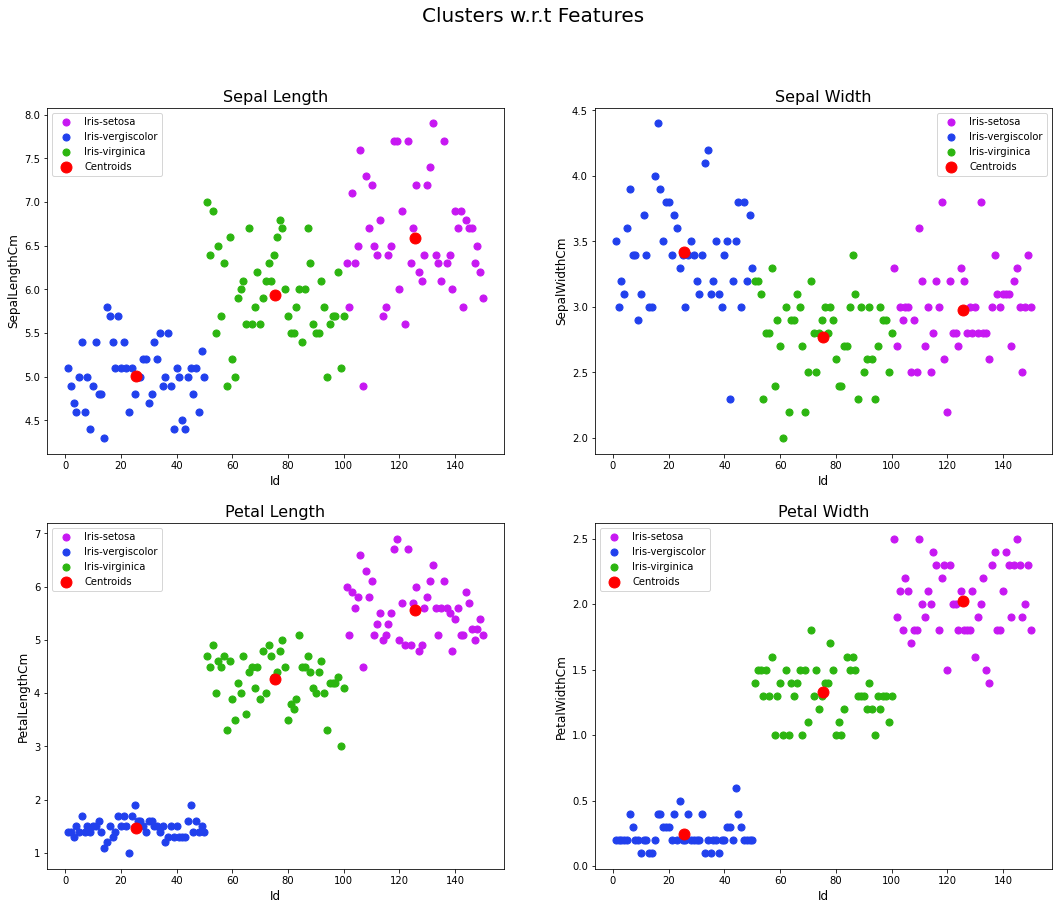

In [47]:
Features = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
plt.figure(figsize=(18,14))
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.scatter(x[predictions == 0,0], x[predictions == 0,i], s=50, c = '#c718f2', label = 'Iris-setosa' )
    plt.scatter(x[predictions == 1,0], x[predictions == 1,i], s=50, c = '#2140ed', label = 'Iris-vergiscolor' )
    plt.scatter(x[predictions == 2,0], x[predictions == 2,i], s=50, c = '#2cb510', label = 'Iris-virginica' )
    #centroids of the clusters
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,i], s = 120, c = 'red', label = 'Centroids')
    plt.title(Features[i-1],size=16)
    plt.xlabel('Id',size=12)
    plt.ylabel(iris_data.columns[i],size=12)
    plt.legend()
plt.suptitle('Clusters w.r.t Features',fontsize=20)